70 273 filas

unidad de análisis: especie × localización

**features clave:**

log_mp_particles_ml → exposición

distance_km → atenuación espacial

log_toxic_pressure → toxicidad relativa

vuln → vulnerabilidad biológica

**targets**:

eco_risk_index (0–100, continuo)

eco_risk_class (low / medium / high)

In [12]:
import pandas as pd
df = pd.read_parquet("../data/dataset.parquet")
df


,iucn_id,sci_name,vuln,mp_particles_ml,log_mp_particles_ml,distance_km,log_toxic_pressure,eco_risk_score,eco_risk_index,eco_risk_class,geometry
0,0,Hubbsina turneri,4,1.587223e-05,-4.799362,244.627454,-6.214335,-24.857341,56.022299,medium,b'\x01\x01\x00\x00\x00+\xb6\x82\xc8\xf0\x8be\x...
1,1,Hubbsina turneri,4,1.848187e-05,-4.733254,237.016490,-6.148227,-24.592909,56.536631,medium,b'\x01\x01\x00\x00\x00\xef\xe4\xba\xa6 \x9ce\x...
2,2,Hubbsina turneri,4,1.840102e-05,-4.735158,237.235710,-6.150131,-24.600526,56.521817,medium,b'\x01\x01\x00\x00\x00R\\\xa2\xf9\xaf\x9ce\xc1...
3,3,Ictalurus mexicanus,2,8.191469e-05,-4.086638,176.956193,-5.501612,-11.003223,82.969202,high,b'\x01\x01\x00\x00\x00\xdbR\x9a\xf3j\x18e\xc1\...
4,4,Ictalurus mexicanus,2,9.304551e-05,-4.031305,170.585676,-5.446278,-10.892556,83.184454,high,b'\x01\x01\x00\x00\x00B\xd8\xf1-y\x15e\xc1\x9f...
...,...,...,...,...,...,...,...,...,...,...,...
70268,70268,Macrobrachium thysi,2,1.809228e-16,-11.999921,959.001335,-13.414895,-26.829790,52.185796,medium,b'\x01\x01\x00\x00\x00O<\\\xa7Qe\x14\xc1\x91\x...
70269,70269,Macrobrachium thysi,2,3.291880e-16,-11.999857,929.073411,-13.414830,-26.829661,52.186046,medium,b'\x01\x01\x00\x00\x00!\x02(\x9dX\xec\x17\xc1j...
70270,70270,Macrobrachium thysi,2,3.278966e-16,-11.999858,929.269937,-13.414831,-26.829662,52.186044,medium,b'\x01\x01\x00\x00\x00n\xf5\xaePF\xde\x17\xc1?...
70271,70271,Macrobrachium thysi,2,1.139946e-15,-11.999505,866.968072,-13.414479,-26.828957,52.187415,medium,b'\x01\x01\x00\x00\x00\xe8\x95b\xe4\x18\x03\x1...


In [13]:
df.shape

(70273, 11)

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 70273 entries, 0 to 70272
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   iucn_id              70273 non-null  int64  
 1   sci_name             70273 non-null  object 
 2   vuln                 70273 non-null  int64  
 3   mp_particles_ml      70273 non-null  float64
 4   log_mp_particles_ml  70273 non-null  float64
 5   distance_km          70273 non-null  float64
 6   log_toxic_pressure   70273 non-null  float64
 7   eco_risk_score       70273 non-null  float64
 8   eco_risk_index       70273 non-null  float64
 9   eco_risk_class       70273 non-null  object 
 10  geometry             70273 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 6.4+ MB


DISTRIBUCIÓN DE LAS VARIABLES

In [15]:
df.describe()


,iucn_id,vuln,mp_particles_ml,log_mp_particles_ml,distance_km,log_toxic_pressure,eco_risk_score,eco_risk_index
count,70273.00000,70273.000000,7.027300e+04,70273.000000,70273.000000,70273.000000,70273.000000,70273.000000
mean,35136.00000,1.583723,4.833283e-05,-9.788672,250.794681,-11.203645,-17.870840,69.611368
std,20286.21207,0.777699,1.574806e-03,2.226631,302.824466,2.226631,9.795592,19.052880
min,0.00000,1.000000,0.000000e+00,-12.000000,0.045987,-13.414973,-53.659893,0.000000
25%,17568.00000,1.000000,0.000000e+00,-12.000000,85.596862,-13.414973,-26.829947,52.185490
50%,35136.00000,1.000000,1.578538e-10,-9.799003,176.394636,-11.213976,-13.414973,78.278236
75%,52704.00000,2.000000,3.621017e-09,-8.441049,277.765575,-9.856023,-10.553976,83.843008
max,70272.00000,4.000000,1.886896e-01,-0.724252,4577.435697,-2.139225,-2.247237,100.000000


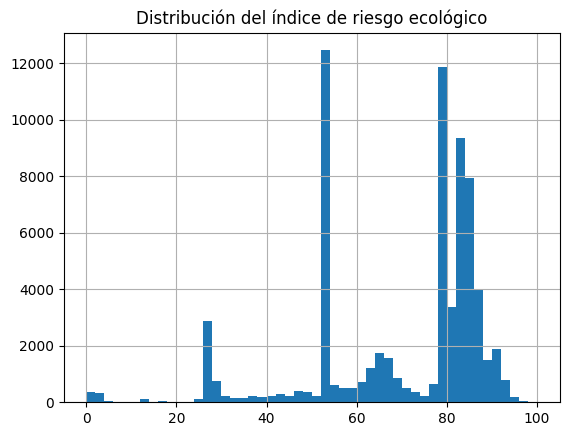

In [16]:
import matplotlib.pyplot as plt

df["eco_risk_index"].hist(bins=50)
plt.title("Distribución del índice de riesgo ecológico")
plt.show()


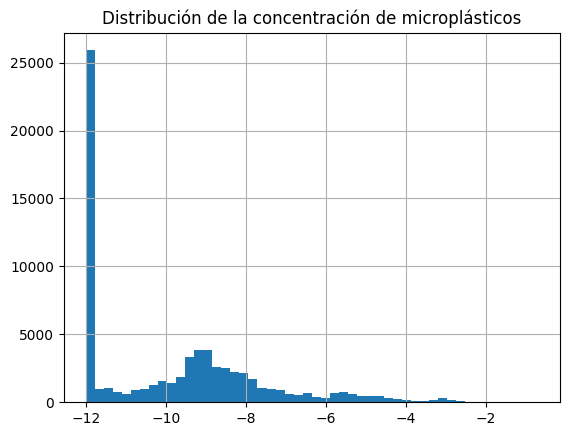

In [17]:
import matplotlib.pyplot as plt

df["log_mp_particles_ml"].hist(bins=50)
plt.title("Distribución de la concentración de microplásticos")
plt.show()


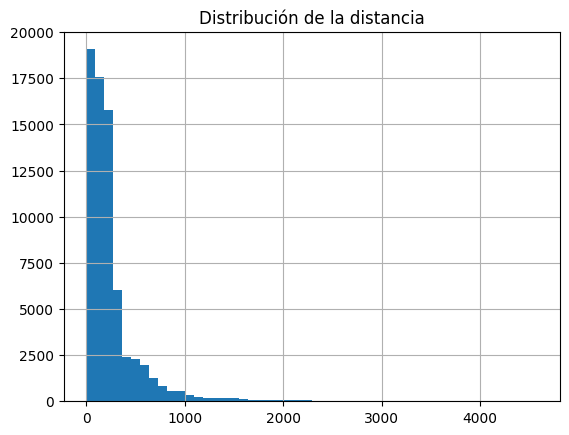

In [18]:
import matplotlib.pyplot as plt

df["distance_km"].hist(bins=50)
plt.title("Distribución de la distancia")
plt.show()


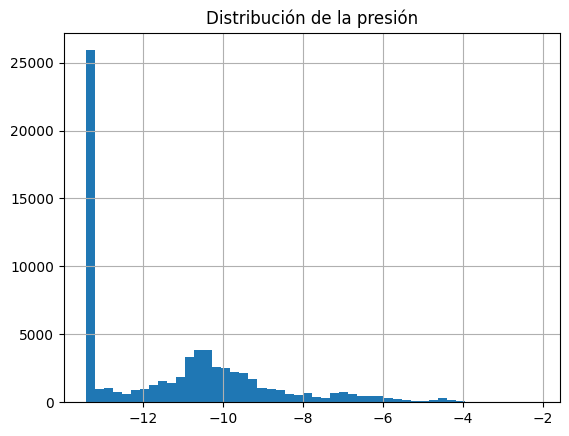

In [19]:
df["log_toxic_pressure"].hist(bins=50)
plt.title("Distribución de la presión")
plt.show()


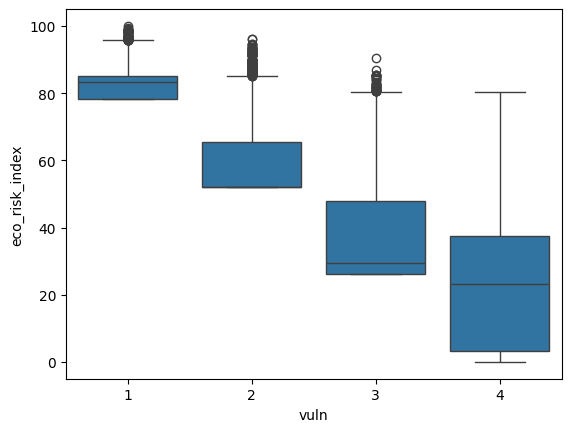

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x="vuln",
    y="eco_risk_index",
    data=df
)
plt.show()


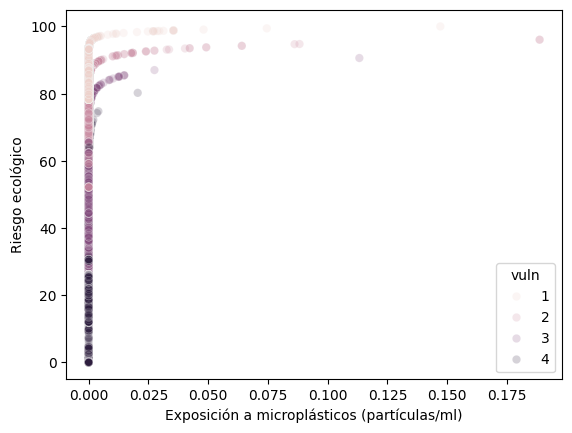

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x=df["mp_particles_ml"],
    y=df["eco_risk_index"],
    alpha=0.2,
    hue=df["vuln"]
)
plt.xlabel("Exposición a microplásticos (partículas/ml)")
plt.ylabel("Riesgo ecológico")
plt.show()

